Modelling occurence of heart desease with logit regression and decision tree.

Data source: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

In [32]:
#First step is to import necessary libraries and set directory

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import matplotlib.pyplot as plt
import os

os.chdir("/Users/sbbogdyn/Desktop/PYTHON/Heart Disease Logit and Decision Tree")

In [3]:
#Loading the data

data = pd.read_csv("heart.csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


The data used in the model are:
1) age - age in years
2) sex - 1:male, 0:female
3) cp - type of chest pain (from 0: least significant to 3: significant)
4) trestbps - resting blood pressure (in mm Hg on admission to the hospital)
5) chol - serum cholestoral in mg/dl
6) fbs - (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
7) restecg - resting electrocardiographic results
8) thalach - maximum heart rate achieved
9) exang - exercise induced angina (1 = yes; 0 = no)
10) oldpeak - ST depression induced by exercise relative to rest
11) slope - the slope of the peak exercise ST segment
12) ca - number of major vessels (0-3) colored by flourosopy
13) thal - hemoglobin production (1 = normal; 2 = fixed defect; 3 = reversable defect)
14) target - occurennce of heart disease ( 0 = no; 1 = yes)

For the purpose of logit model, we will use first 13 variables as explanatory (X) and 'target' variable as Y.

In [6]:
#Transforming variables to integer type
data['oldpeak']=data['oldpeak'].astype(int)

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1,1,3,2,0


### Logit model

The first ml technique used for the analysis purpose is logit model. We will first split
the dataset to training and testing sets in 80:20 proportion. Then model will be fitted and evaluated
on its accuracy, specificity, sensitivity. Moreover, ROC Curve for the model will be created. Lastly model will be cross-validated.

In [28]:
target = data['target']

X_train, X_test, y_train, y_test = train_test_split(data.drop('target', axis=1), data['target'], test_size=0.2, random_state=42)

#Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
#Create a logistic regression model
logit_model = LogisticRegression(max_iter=1000)

#Training the model 
logit_model.fit(X_train_scaled, y_train)

#Predicting 
y_pred = logit_model.predict(X_test_scaled)
y_pred_proba = logit_model.predict_proba(X_test_scaled)[:, 1]  

cm = confusion_matrix(y_test, y_pred)
sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)


Accuracy: 0.7853658536585366
Sensitivity: 0.8543689320388349
Specificity: 0.7156862745098039


Model accuracy is at 0.79 level, which indicates that 79% of all observations were classified correctly.

Model sensitivity is at 0.85 level, meaning that 85% of all observations in which heart disease occured were
classified correctly.

Model Specificity is at 0.72 level, which means that 72% of all observations in which heart disease did not occure were classified correctly.

Based on that information, we can assume that the model is reliable, as all metrics exceed 70% level.

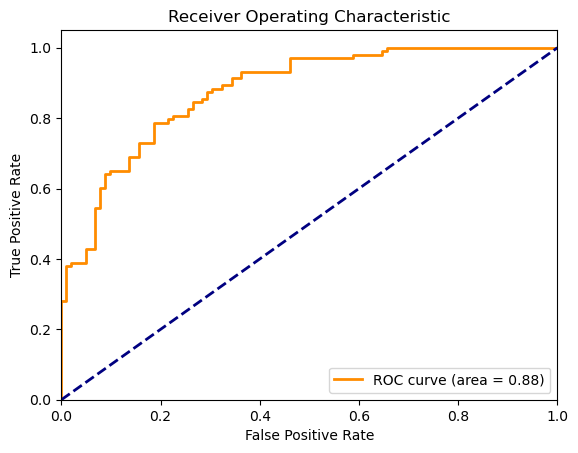

In [30]:
#To showcase the correctness of model classification we will also plot the ROC curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Area under the curve is set at 0.88, which means that a randomly selected observation with heart disease is ranked higher than a randomly selected observation with no heart disease based on the predicted probabilities.

With area under the curve 0.88 we can assume that model has good classifying capabilities.

In [31]:
#Cross validation

cv_scores = cross_val_score(logit_model, X_train_scaled, y_train, cv=5)  # 5-fold cross-validation
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.84756098 0.8597561  0.87804878 0.86585366 0.79878049]
Average cross-validation score: 0.85


Cross validation shows us that based on the data split model accuracy can go up to 0.88 level, or drop do sub 0.8 level. However, on average model accuracy is at 0.85 level.

### Decision tree

The second part of the analysis is to create a decision tree to predict the occurence of heart disease.
Later, the model will be evaluated based on the same metrics as the logit model.

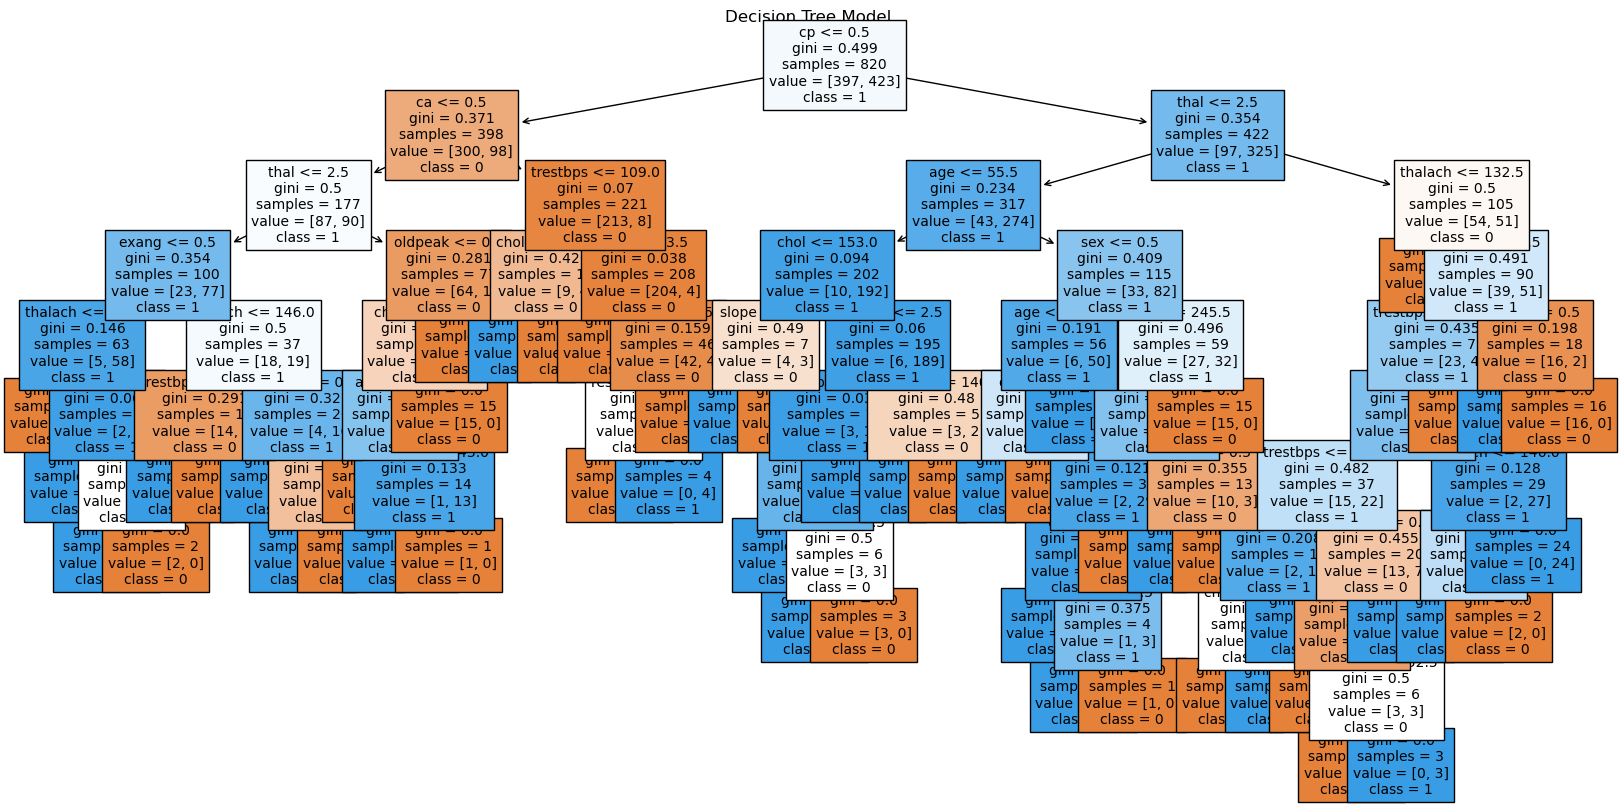

In [34]:
decision_tree = DecisionTreeClassifier(random_state=42)

#Fitting the model
decision_tree.fit(X_train, y_train)

#Predicting
y_pred = decision_tree.predict(X_test)
y_pred_proba = decision_tree.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

#Calculating accuracy, sensitivity, and specificity
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

#Plotting the decision tree
plt.figure(figsize=(20,10))
plot_tree(decision_tree, filled=True, feature_names=list(data.columns[:-1]), class_names=['0', '1'], fontsize=10)
plt.title("Decision Tree Model")
plt.show()


Decision tree is created. However, the window size makes it hard to correctly verify.
Therefore we will use the same evaluation metrics as in the logit model.

In [35]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Accuracy: 0.9853658536585366
Sensitivity: 0.970873786407767
Specificity: 1.0


Model accuracy is at 0.99 level, which indicates that 99% of all observations were classified correctly.

Model sensitivity is at 0.97 level, meaning that 97% of all observations in which heart disease occured were
classified correctly.

Model Specificity is at 1.0 level, which means that 100% of all observations in which heart disease did not occure were classified correctly.

Based on that information, we can assume that the model is reliable, as all metrics exceed 95% level.

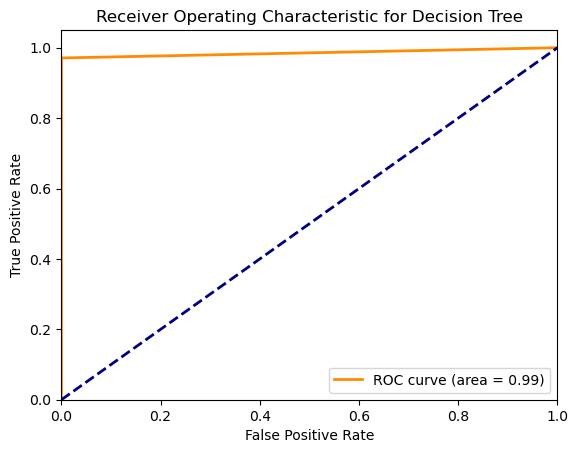

In [36]:
#To showcase the correctness of model classification we will also plot the ROC curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Decision Tree')
plt.legend(loc="lower right")
plt.show()

Area under the curve is set at 0.99, which means that a randomly selected observation with heart disease is ranked higher than a randomly selected observation with no heart disease based on the predicted probabilities.

With area under the curve 0.99 we can assume that model has great classifying capabilities.

In [37]:
#Cross validation

cv_scores = cross_val_score(decision_tree, X_train, y_train, cv=5)  # 5-fold cross-validation
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.97560976 0.95121951 1.         0.99390244 0.94512195]
Average cross-validation score: 0.9731707317073172


Cross validation shows us that based on the data split model accuracy can go up to 1.0 level, or drop do sub 0.945 level. However, on average model accuracy is at 0.97 level.

### Final Thoughts

The main goal of the project was creating a classification model to correctly classify patients with heart disease. To approach that, two model were created and later evaluated.

All metrics that were used: accuracy, sensitivity, specifity, area under ROC Curve and cross-validation metrics
indicate that decision tree model is better at correctly classifying patients with heart disease.

What further steps could be undertaken?

First of all, both model showcased good classification capabilities, and have their strengths and weaknesses.
To increase the usability of logit model we could add more explanatory variables, and check for their statistical significance. 
As for the decision tree, the plot of it is hard to read, therefore performing pruning might result in better plot as well as quicker execution time.